<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(0)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.983803,59.569123,21.326375,0.416366,145.295668,144.837888,0.457780
1,0.0,1.0,81.854916,45.530040,49.946229,0.432551,187.763736,187.636415,0.127321
2,0.0,2.0,28.068800,86.417842,68.984240,-1.224161,192.246721,193.092500,-0.845779
3,0.0,3.0,92.997974,77.989154,84.055826,1.398704,266.441657,265.248458,1.193199
4,0.0,4.0,25.081975,44.974484,44.218181,-0.361126,123.913513,124.132147,-0.218633
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,49.595436,30.350739,48.912061,1.543873,140.402108,139.354401,1.047708
19996,999.0,16.0,61.105174,62.483395,25.222228,-0.399294,158.411503,159.076309,-0.664806
19997,999.0,17.0,44.193650,50.343925,98.628085,-1.491651,201.674010,202.721061,-1.047051
19998,999.0,18.0,88.571172,40.245329,75.171746,0.728542,214.716788,213.640775,1.076014


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.983803,59.569123,21.326375,0.416366,145.295668,144.837888,0.457780
1,0.0,1.0,81.854916,45.530040,49.946229,0.432551,187.763736,187.636415,0.127321
2,0.0,2.0,28.068800,86.417842,68.984240,-1.224161,192.246721,193.092500,-0.845779
3,0.0,3.0,92.997974,77.989154,84.055826,1.398704,266.441657,265.248458,1.193199
4,0.0,4.0,25.081975,44.974484,44.218181,-0.361126,123.913513,124.132147,-0.218633
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,49.595436,30.350739,48.912061,1.543873,140.402108,139.354401,1.047708
19996,999.0,16.0,61.105174,62.483395,25.222228,-0.399294,158.411503,159.076309,-0.664806
19997,999.0,17.0,44.193650,50.343925,98.628085,-1.491651,201.674010,202.721061,-1.047051
19998,999.0,18.0,88.571172,40.245329,75.171746,0.728542,214.716788,213.640775,1.076014


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    53.983803  59.569123  21.326375  0.416366  145.295668   
      1.0    81.854916  45.530040  49.946229  0.432551  187.763736   
      2.0    28.068800  86.417842  68.984240 -1.224161  192.246721   
      3.0    92.997974  77.989154  84.055826  1.398704  266.441657   
      4.0    25.081975  44.974484  44.218181 -0.361126  123.913513   
...                ...        ...        ...       ...         ...   
999.0 15.0   49.595436  30.350739  48.912061  1.543873  140.402108   
      16.0   61.105174  62.483395  25.222228 -0.399294  158.411503   
      17.0   44.193650  50.343925  98.628085 -1.491651  201.674010   
      18.0   88.571172  40.245329  75.171746  0.728542  214.716788   
      19.0   65.077635  63.508413  43.738925 -0.285184  182.039789   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    144.837888  0.457780  
      1.0    187.636415  0.127321  
      2.0    193.092500 -0.845779  
      3.0    265.248458  1.193199  
      4.0    124.132147 -0.218633  
...                 ...       ...  
999.0 15.0   139.354401  1.047708  
      16.0   159.076309 -0.664806  
      17.0   202.721061 -1.047051  
      18.0   213.640775  1.076014  
      19.0   182.282030 -0.242241  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    53.983803  59.569123  21.326375  0.416366  145.295668   
      1.0    81.854916  45.530040  49.946229  0.432551  187.763736   
      2.0    28.068800  86.417842  68.984240 -1.224161  192.246721   
      3.0    92.997974  77.989154  84.055826  1.398704  266.441657   
      4.0    25.081975  44.974484  44.218181 -0.361126  123.913513   
...                ...        ...        ...       ...         ...   
999.0 15.0   49.595436  30.350739  48.912061  1.543873  140.402108   
      16.0   61.105174  62.483395  25.222228 -0.399294  158.411503   
      17.0   44.193650  50.343925  98.628085 -1.491651  201.674010   
      18.0   88.571172  40.245329  75.171746  0.728542  214.716788   
      19.0   65.077635  63.508413  43.738925 -0.285184  182.039789   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    144.837888  0.457780  
      1.0    187.636415  0.127321  
      2.0    193.092500 -0.845779  
      3.0    265.248458  1.193199  
      4.0    124.132147 -0.218633  
...                 ...       ...  
999.0 15.0   139.354401  1.047708  
      16.0   159.076309 -0.664806  
      17.0   202.721061 -1.047051  
      18.0   213.640775  1.076014  
      19.0   182.282030 -0.242241  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.983803,59.569123,21.326375,0.416366,145.295668,144.837888,0.457780
1,0.0,1.0,81.854916,45.530040,49.946229,0.432551,187.763736,187.636415,0.127321
2,0.0,2.0,28.068800,86.417842,68.984240,-1.224161,192.246721,193.092500,-0.845779
3,0.0,3.0,92.997974,77.989154,84.055826,1.398704,266.441657,265.248458,1.193199
4,0.0,4.0,25.081975,44.974484,44.218181,-0.361126,123.913513,124.132147,-0.218633
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,49.595436,30.350739,48.912061,1.543873,140.402108,139.354401,1.047708
19996,999.0,16.0,61.105174,62.483395,25.222228,-0.399294,158.411503,159.076309,-0.664806
19997,999.0,17.0,44.193650,50.343925,98.628085,-1.491651,201.674010,202.721061,-1.047051
19998,999.0,18.0,88.571172,40.245329,75.171746,0.728542,214.716788,213.640775,1.076014


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    53.983803  59.569123  21.326375  0.416366  145.295668   
      1.0    81.854916  45.530040  49.946229  0.432551  187.763736   
      2.0    28.068800  86.417842  68.984240 -1.224161  192.246721   
      3.0    92.997974  77.989154  84.055826  1.398704  266.441657   
      4.0    25.081975  44.974484  44.218181 -0.361126  123.913513   
...                ...        ...        ...       ...         ...   
999.0 15.0   49.595436  30.350739  48.912061  1.543873  140.402108   
      16.0   61.105174  62.483395  25.222228 -0.399294  158.411503   
      17.0   44.193650  50.343925  98.628085 -1.491651  201.674010   
      18.0   88.571172  40.245329  75.171746  0.728542  214.716788   
      19.0   65.077635  63.508413  43.738925 -0.285184  182.039789   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    144.837888  0.457780  
      1.0    187.636415  0.127321  
      2.0    193.092500 -0.845779  
      3.0    265.248458  1.193199  
      4.0    124.132147 -0.218633  
...                 ...       ...  
999.0 15.0   139.354401  1.047708  
      16.0   159.076309 -0.664806  
      17.0   202.721061 -1.047051  
      18.0   213.640775  1.076014  
      19.0   182.282030 -0.242241  

[20000 rows x 7 columns]

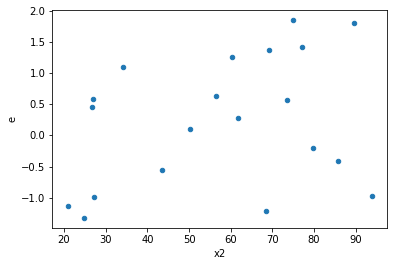

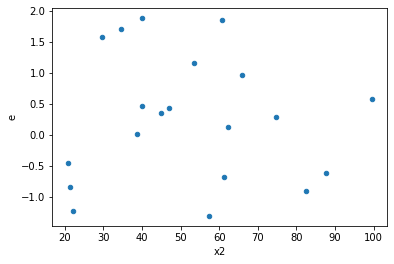

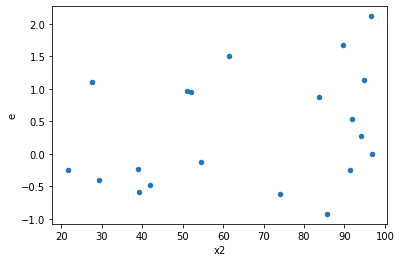

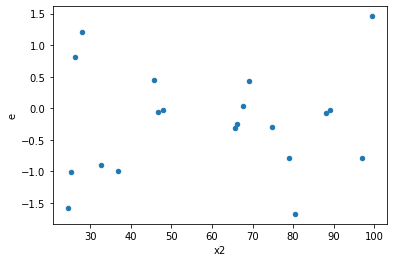

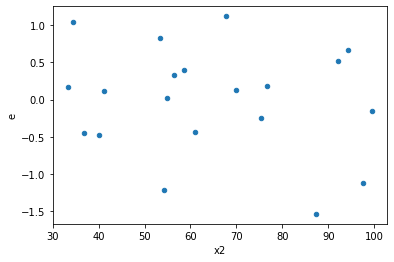

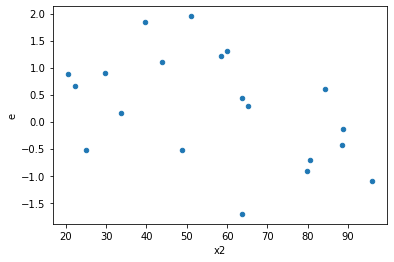

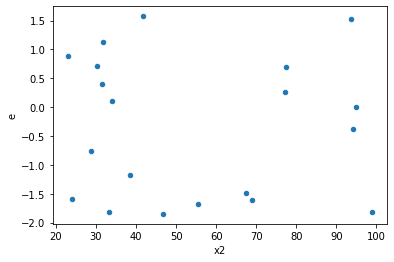

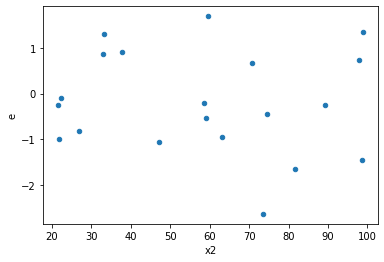

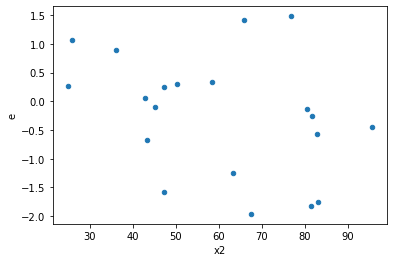

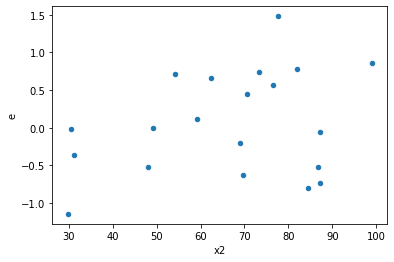

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,5.0,2.5023276033839177,7.225351194188202,0.5004655206767835,1.4450702388376404,2.8874521403261917,0.2693613904632619,0.865319304768369,0.13468069523163095,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,1.7333974291565444,2.1852107156734966,0.34667948583130886,0.4370421431346993,1.2606518729734129,0.8055600783409465,0.5972199608295268,0.4027800391704732,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,6.801145576293286,7.22973259005331,1.3602291152586572,1.4459465180106619,1.0630168857514162,0.9481677120422591,0.5259161439788704,0.47408385602112957,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,1.3540676651836179,4.546882615380452,0.27081353303672356,0.9093765230760903,3.3579434265302193,0.20977858893730095,0.8951107055313495,0.10488929446865047,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,3.4699822926527015,4.48782155815909,0.6939964585305403,0.8975643116318179,1.2933269335873987,0.7846342749310233,0.6076828625344883,0.39231713746551167,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.8047693356383527,3.324622074825258,0.16095386712767054,0.6649244149650516,4.131149048053786,0.145618853082486,0.927190573458757,0.072809426541243,Reject005=1 : Homoscedasticity
9.0,5.0,5.0,0.2957207304274324,5.484040493741327,0.05914414608548648,1.0968080987482653,18.54466031452965,0.006084509348934342,0.9969577453255328,0.003042254674467171,Reject005=0 : Heteroscedasticity
10.0,5.0,5.0,4.845557799276071,5.1626808805351345,0.9691115598552142,1.0325361761070269,1.0654461456029771,0.9462348313147331,0.5268825843426335,0.47311741565736654,Reject005=1 : Homoscedasticity
13.0,5.0,5.0,1.0802098792227386,4.417837798102725,0.2160419758445477,0.883567559620545,4.089795773096952,0.14830435790118268,0.9258478210494087,0.07415217895059134,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,3.8293746445652403,2.5699098611246987,0.7658749289130481,0.5139819722249397,0.6711043185006693,0.6723126299784657,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,2.5023276033839177,7.225351194188202,0.5004655206767835,1.4450702388376404,2.8874521403261917,0.2693613904632619,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,1.7333974291565444,2.1852107156734966,0.34667948583130886,0.4370421431346993,1.2606518729734129,0.8055600783409465,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,6.801145576293286,7.22973259005331,1.3602291152586572,1.4459465180106619,1.0630168857514162,0.9481677120422591,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,3.3905053215053824,2.368650285804667,0.6781010643010765,0.4737300571609334,0.6986127615788514,0.7035020671762853,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,1.3540676651836179,4.546882615380452,0.27081353303672356,0.9093765230760903,3.3579434265302193,0.20977858893730095,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,3.4699822926527015,4.48782155815909,0.6939964585305403,0.8975643116318179,1.2933269335873987,0.7846342749310233,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.8047693356383527,3.324622074825258,0.16095386712767054,0.6649244149650516,4.131149048053786,0.145618853082486,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,3.5395436498768866,2.6652910142793114,0.7079087299753773,0.5330582028558623,0.75300413779952,0.7631703070437035,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      912
Reject005=0 : Heteroscedasticity     88
Name: Result_test, dtype: int64